<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Canela Orellana
- Nombre de alumno 2: Isabel Marx


### **Link de repositorio de GitHub:** https://github.com/CanelaOrellana/MDS7202-IsabelMarx-y-CanelaOrellana

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/lab10'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


In [ ]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Metricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
import numpy as np
import pandas as pd
!unzip '/content/drive/MyDrive/lab10/diabetes_data.csv.zip'
df = pd.read_csv('diabetes_data.csv')
df.head(4)

Archive:  /content/drive/MyDrive/lab10/diabetes_data.csv.zip
  inflating: diabetes_data.csv       


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [ ]:
!pip install xgboost

In [ ]:
# Inserte su código aquí

In [ ]:
!pip install ipywidgets
!pip install pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(
    df,
    title="Reporte Housing Pricing",
    explorative=True,
    vars={"num": {"low_categorical_threshold": 0}},  # resolver problema #954
)

# Problema 954:
# https://github.com/ydataai/pandas-profiling/issues/954

profile.to_file("report.html")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c7740e5113fbd4e209e553c143f4c81462afd81e89d0e1455ecb93fceb7a2ec5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: word

<ipython-input-6-b8aecf363d84>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [ ]:
ct = ColumnTransformer(
    transformers=[
        ('MinMax', MinMaxScaler(),['Age', 'BMI', 'GenHlth']),
        ('PowerTransform', PowerTransformer() , ['MentHlth', 'PhysHlth'])]
    , remainder="passthrough"
)

Para el preprocesamiento, se toman las 5 columnas que no son binarias y se escalan según las distribuciones observadas en el *profile report*.

- MinMaxScaler: columnas numéricas, cuya distribución no fuera tan similar a una normal, pero tampoco tan distante:
  - ```'Age'```
  - ```'BMI'```
  - ```'GenHlth'```

- PowerTransform: columnas con una distribución muy diferente a la normal:
  - ```'MentHlth'```
  - ```'PhysHlth'```

In [ ]:
import xgboost

XGB = xgboost.XGBClassifier()

xgb_pipeline = Pipeline(
    steps=[
        ("Preprocessing", ct),
        ("clf", XGB)])

En el bloque de código anterior se creó el pipeline que permitirá realizar la clasificación con ```XGBoost```.  

En el bloque de código siguiente,
- Se dividirá el dataset en *train* y *test* para realizar el entrenamiento del clasificador
- Se entrenará el clasificador utilizando el pipeline creado
- Se realizará la predicción de los datos de *test*
- Se generará un ```classification_report``` para obtener las principales métricas del clasificador
- Se obtendrá la matriz de confusión del rendimiento del clasificador

In [ ]:
from sklearn.model_selection import train_test_split
#Se divide el dataset
y = df['Diabetes']
X = df.drop(columns=['Diabetes'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

xgb_pipeline.fit(X_train, y_train)    #entrenamiento
y_pred = xgb_pipeline.predict(X_test) #predicción

#Classification report
print('Classification report XGBoost')
print(classification_report(y_test, y_pred))

#Matriz de Confusión
fig = px.imshow(confusion_matrix(y_test, y_pred, normalize='true'), text_auto=True,color_continuous_scale='BuPu')
fig.show()

Classification report XGBoost
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     11720
         1.0       0.73      0.78      0.75     11609

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



A partir de los resultados obtenidos, lo primero que se nota es que el clasificador obtenido *( , a diferencia de los últimos dos laboratorios)* no tiene problemas específicos con predecir ninguna de las dos clases.  

Tanto para ```precision```, ```recall``` y ```f1-score``` se obtienen valores entre ```0.7``` y ```0.8```, esto se interpreta como:

- ```precision```: de las personas identificadas con diabetes, un ```73%``` realmente tiene la enfermedad, mientras que de las personas que se identificaron sanas, sólo un ```77%``` realmente lo está.

- ```recall```: se logra detectar un ```71%``` de las personas que no tienen diabetes y un ```78%``` de las que sí poseen la enfermedad.

- ```f1-score```: esta medida considera con igual importancia tanto el ```precision``` como el ```recall```, en este caso en particular, si bien nos interesan ambas medidas, es decir, se quiere identificar al mayor porcentaje posible de las personas con diabetes y también se quiere que las clasificaciones reaizadas sean lo más precisas posibles, ya que sería grave iniciar un tratamiento que una persona no necesita, así como el hecho de que una persona que tenga la enfermedad, no reciba tratamiento. Para las personas sanas se obtuvo un ```74%```y para personas con diabetes un ```75%```.

Luego se tiene la matriz de confusión, esta nos permite ver los porcentajes que fueron correctamente predichos para daca clase y en caso de que el clasificador se estuviera confundiento entre dos clases, la matriz de confución permitiría identificarlo. En este caso se obtiene una matriz de confusión diagonal, lo cual es siempre deseado, ya que significa que ambas clases se predicen sin confundirse.  

Considerando lo anterior, se cree que los resultados obtenidos son buenos, pero podrían ser mejores, ya que para que el Dr Simi haga su propaganda, sonaría más confiables si los porcentajes obtenidos fueran mayores (sobre $80\%$).    

Las métricas utilizadas para medir la predictibilidad no permiten asegurar que el modelo cuenta con una buena elección de las features. Un modelo confiable necesita tener mejores métricas, especialmente uno que entrega resultados tan delicados como los que requiere el Dr Simi.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?




Text(0.5, 1.0, 'Feature importance según método gain')

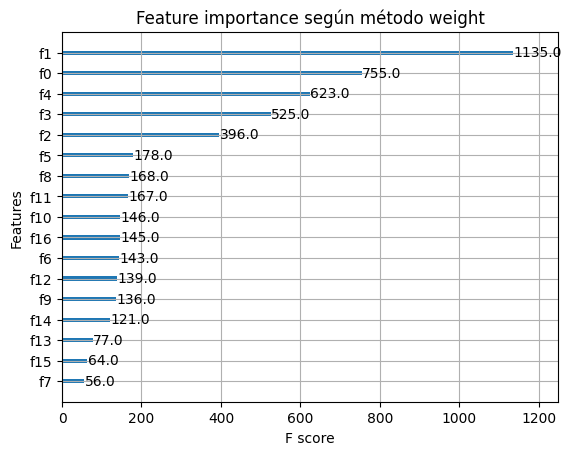

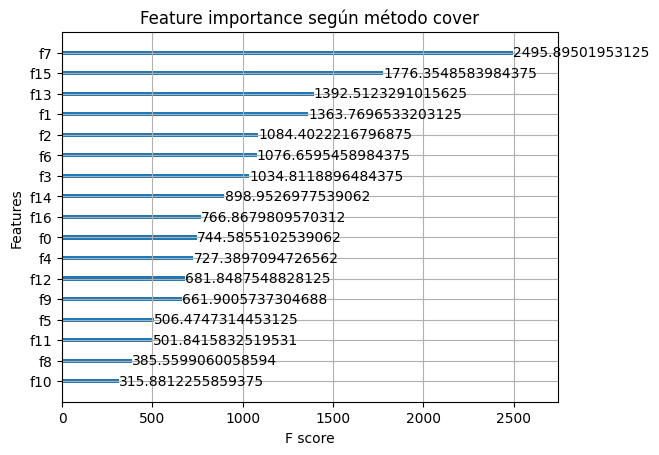

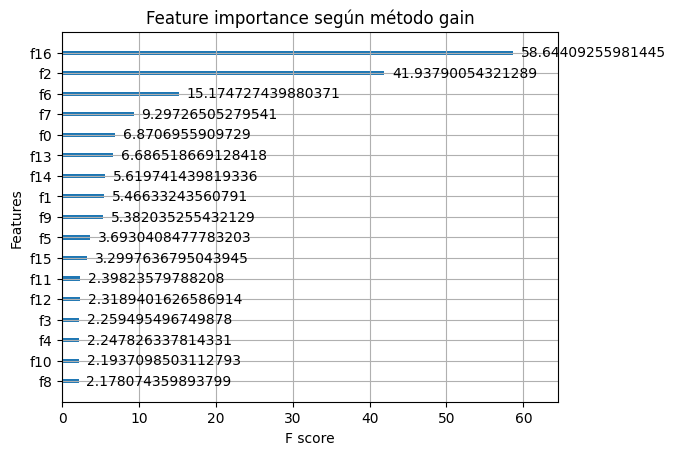

In [ ]:
# Inserte su código aquí
import matplotlib.pyplot as plt

xgboost.plot_importance(XGB, importance_type='weight')
plt.title('Feature importance según método weight')

xgboost.plot_importance(XGB, importance_type='cover')
plt.title('Feature importance según método cover')

xgboost.plot_importance(XGB, importance_type='gain')
plt.title('Feature importance según método gain')

¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?



Los resultados no son compatibles. La importancia de XGBoost se mide en función del número de veces que se utiliza una característica para dividir un nodo en un árbol de decisión. Luego, este número puede aumentar en características con muchos valores posibles, simplemente porque hay más oportunidades de dividirlas.

En el método 'weight' se observa el número de veces que una característica aparece en un árbol. Esto quiere decir que el atributo género juega un papel importante en el árbol, seguido por la edad, lo que es esperable no sólo debido a la correlación esperada entre la variable objetivo y esta característica, sino que también debido a que posee una gran cantidad de posibles valores.

El método 'cover' es la cobertura(número de muestras afectadas por una separación) promedio de separaciones que usan la característica. Al igual que el método gain, también presenta caracterísiticas altamente correlacionadas, sin embargo, estas tienen que ver con el estado físico de los pacientes.

Por último, el método 'gain' representa la ganancia promedio de las separaciones que usan la característica. En otras palabras, es el incremento en accuracy a las ramas donde está una característica, producto de ella misma. En este caso, se observa que aquellas características con las correlaciones más altas con la variable objetivo dominan los primeros lugares en esta importancia. Las características prevalentes en este método parecen tener más relación con el estado de salud del paciente.

Las importancias obtenidas no son suficientes para obtener la interpretabilidad del modelo. Este método no rinde tan bien con datos no estructurados, siendo muy sensible a *outliers*. Además, tiene bajos niveles de transparencia.


## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [ ]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance

clf = xgb_pipeline
data = df

result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=17)

In [ ]:
#se obtienen los nombres de las características
feature_names = ct.get_feature_names_out()

In [ ]:
perm_sorted_std = result.importances_std.argsort()
features = feature_names[perm_sorted_std].tolist()
stds = result.importances_std[perm_sorted_std].tolist()

df_aux = pd.DataFrame(list(zip(features,stds)), columns = ['Feature','Desviación estándar Importance'])
df_aux

,Feature,Desviación estándar Importance
0,remainder__CholCheck,0.000387
1,PowerTransform__MentHlth,0.000418
2,remainder__HeartDiseaseorAttack,0.000490
3,remainder__Stroke,0.000507
4,remainder__Sex,0.000535
5,remainder__Smoker,0.000664
6,remainder__PhysActivity,0.000683
7,MinMax__BMI,0.000688
8,remainder__DiffWalk,0.000734
9,remainder__HighChol,0.000805


En el bloque anterior de código se verificó la desviación estándar obtenida en los resultados, esta representa la variación que experimentan los resultados en la importancia, con incrementos de error en la característica.

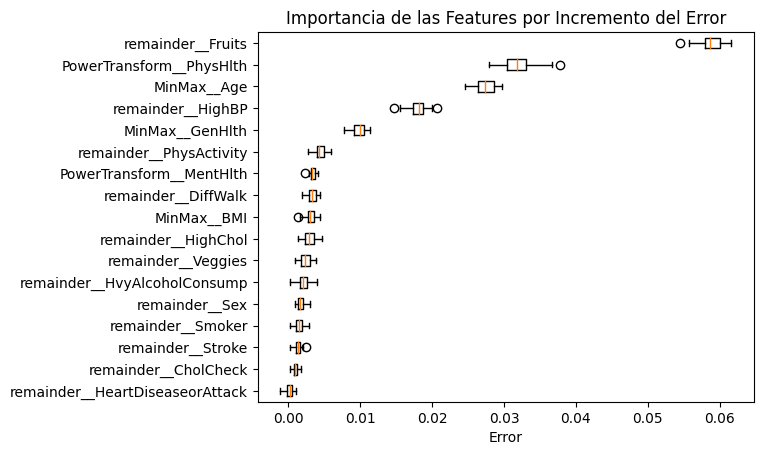

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=feature_names[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

¿Cómo mide la importancia de las features su propuesta?
¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
Nombre y explique 3 ventajas y 3 desventajas del método implementado.

Se escogió utilizar el método ```Permutation Feature Importance```, el cual representa el decrecimiento en el puntaje de un modelo cuando un valor de una muestra es aleatoriamente alterado. Las 5 características con mayor impacto son 'Fruits', 'PhysHlth', 'Age', 'HighBP' y 'GenHlth'. Se observa que estas características tienen que ver con el estado de salud a largo plazo de los pacientes, luego tiene sentido que alterarlas incremente el error de la importancia.

Ventajas:
- No requiere reentrenar el modelo.
- Debido al punto anterior, se puede ahorrar bastante tiempo.
- Reentrenar con un dataset reducido implica cambiar el modelo, mientras Permutation Feature Importance no elimina caracterísitcas, lo que significa que las tasas de error se mantienen comparables.

Desventajas:
- Es un método de aprendizaje supervisado.
- Los resultados pueden variar bastante entre permutaciones.
- Agregar una característica correlacionada puede disminuir la importancia de una característica asociada, ya que se separa la importancia entre ambos atributos.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.0 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
xgb_pipeline['Preprocessing']

ColumnTransformer(remainder='passthrough',
                  transformers=[('MinMax', MinMaxScaler(),
                                 ['Age', 'BMI', 'GenHlth']),
                                ('PowerTransform', PowerTransformer(),
                                 ['MentHlth', 'PhysHlth'])])

In [ ]:
pipeline = Pipeline(
    steps=[
        ("Preprocessing", ct)])

df_pre_transform = pipeline.fit_transform(X)
columns = pipeline['Preprocessing'].get_feature_names_out()

df_transform = pd.DataFrame(df_pre_transform, columns = columns)
#df_transform

In [ ]:
# Inserte código para calcular shapley values aquí

import shap

explainer = shap.TreeExplainer(XGB)
shap_values = explainer(df_transform)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
shap_values

.values =
array([[-1.093731  , -0.27526996,  0.40579212, ..., -0.13742945,
        -0.01619815,  0.3694252 ],
       [ 0.26802894, -0.28151572,  0.23907585, ..., -0.06139257,
         0.18939984,  0.37175626],
       [ 1.0485166 , -0.07015419, -0.9230716 , ..., -0.12095525,
        -0.02122551, -0.6012862 ],
       ...,
       [-0.18558449, -0.44650102,  1.1258321 , ...,  0.32391945,
        -0.02464618,  0.35626793],
       [ 0.30069768, -0.8666303 ,  0.7168092 , ...,  0.25471458,
        -0.04538408,  0.40590057],
       [ 0.08023923, -0.31142005, -0.72195077, ..., -0.11582108,
        -0.02788441,  0.5914987 ]], dtype=float32)

.base_values =
array([-0.00223964, -0.00223964, -0.00223964, ..., -0.00223964,
       -0.00223964, -0.00223964], dtype=float32)

.data =
array([[0.25      , 0.1627907 , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.91666667, 0.1627907 , 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.1627907 , 0.  

 ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

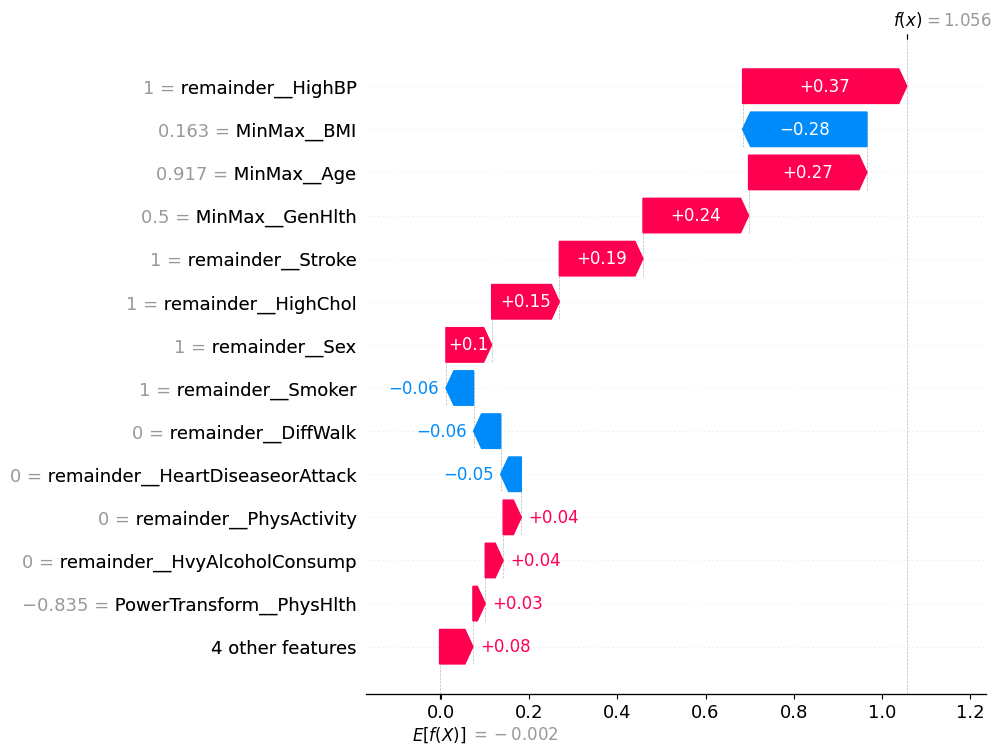

In [ ]:
# Inserte código para generar gráficos de aporte local aquí
idx=1
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

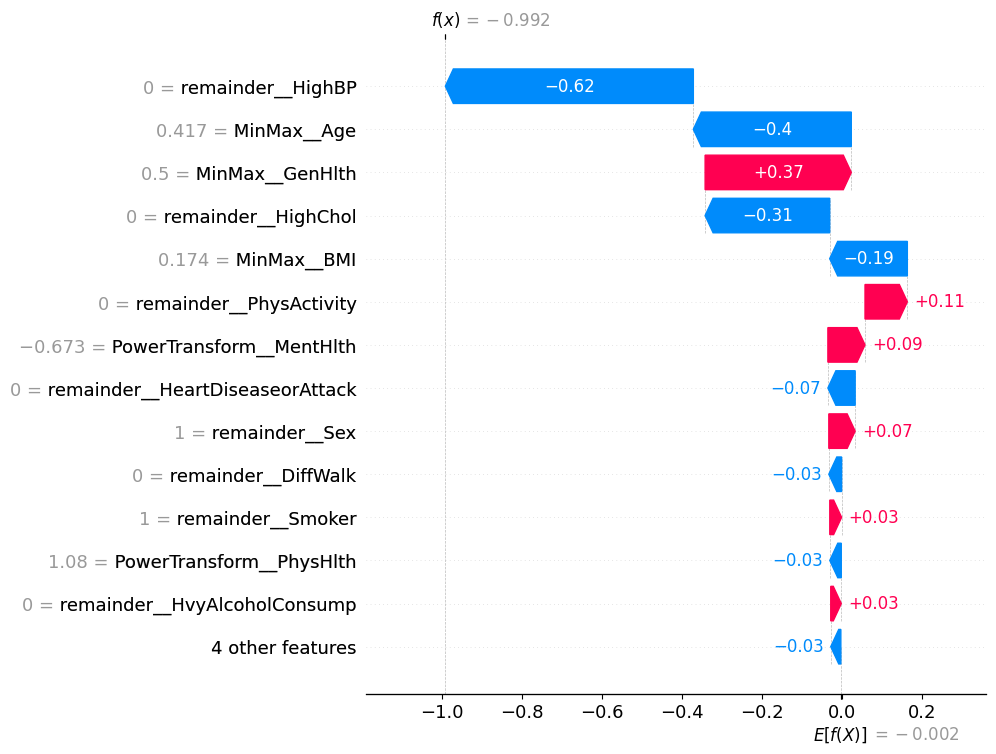

In [ ]:
idx=9
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

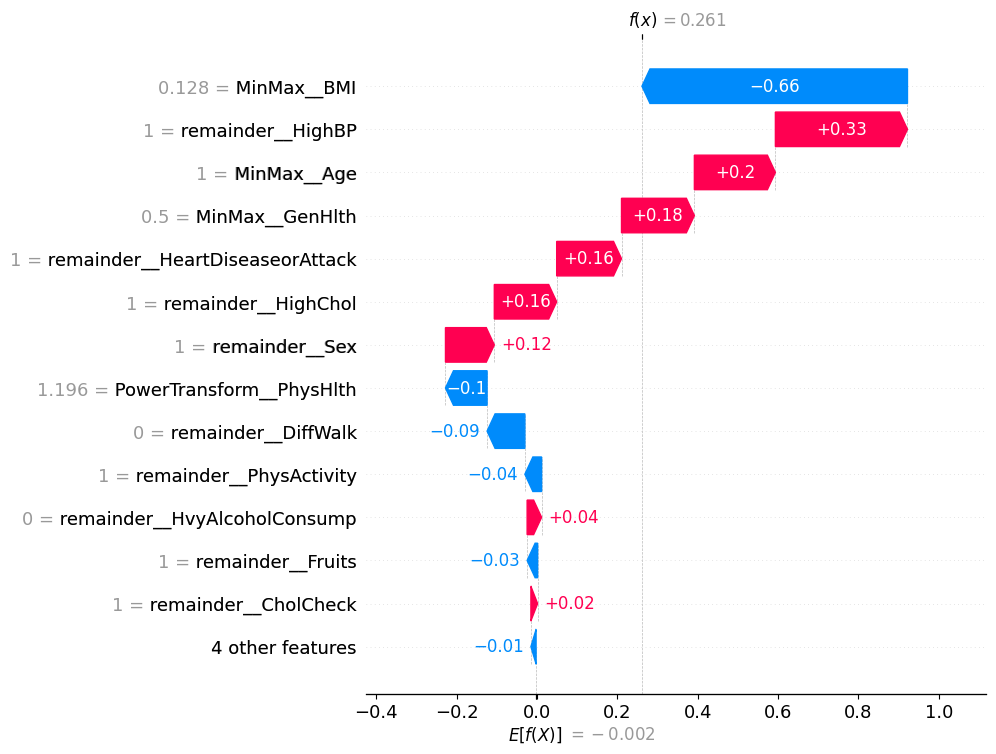

In [ ]:
idx=150
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


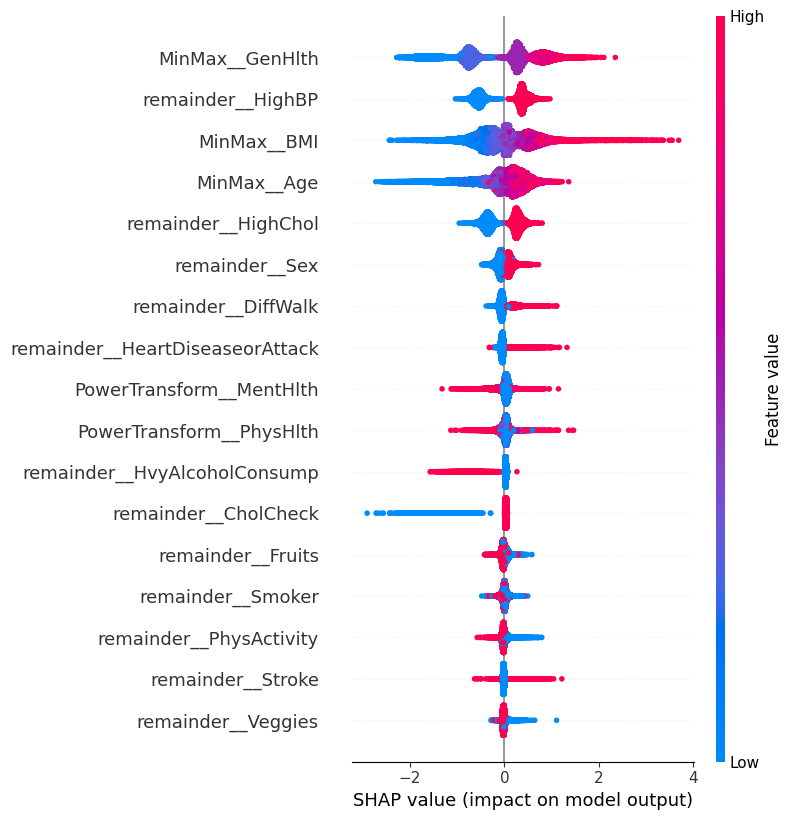

In [ ]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, df_transform)

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

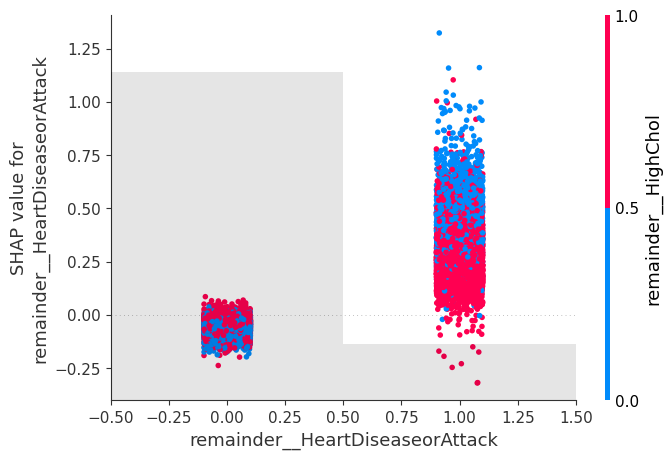

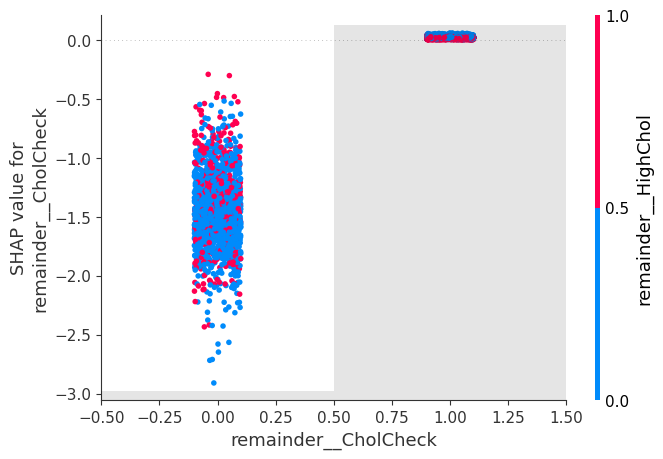

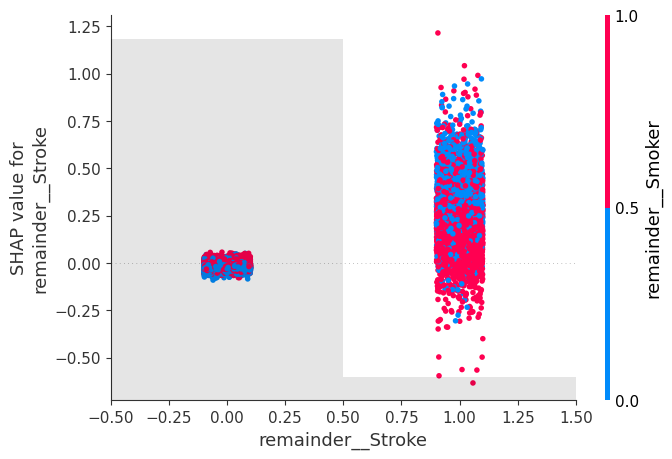

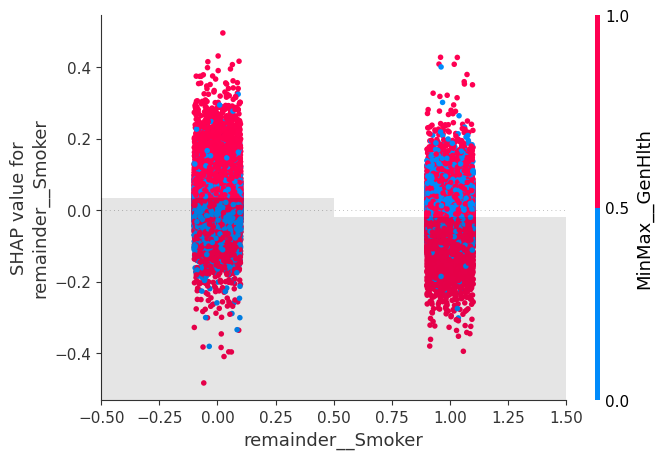

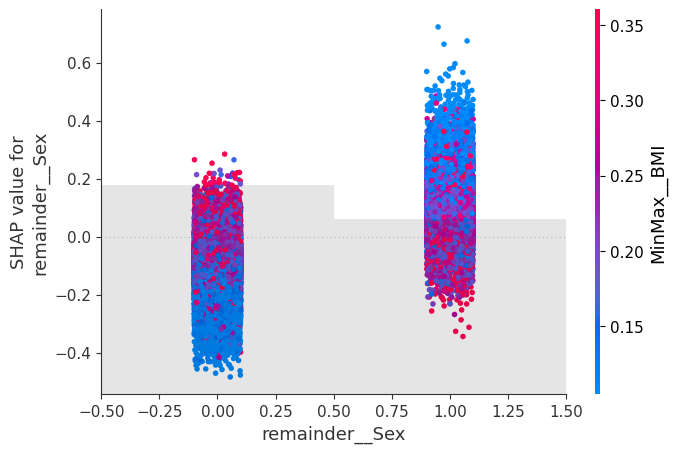

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí

for name in feature_names[perm_sorted_idx][:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name],color=shap_values)

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

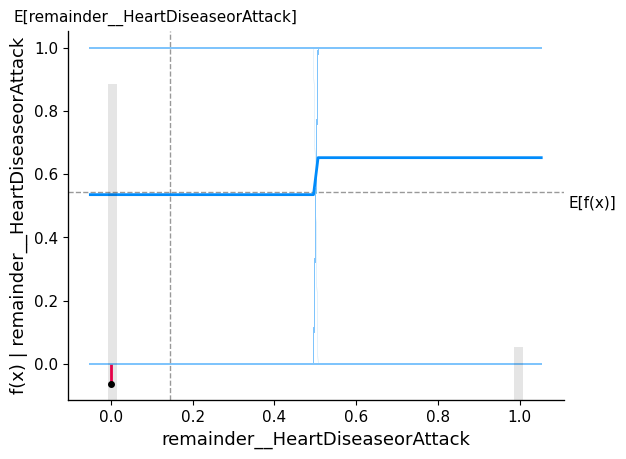

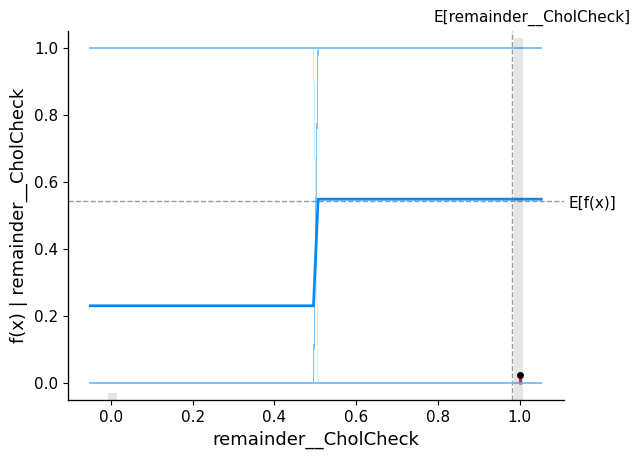

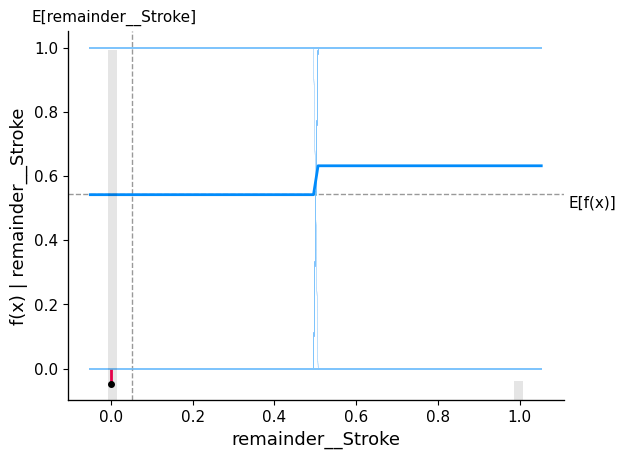

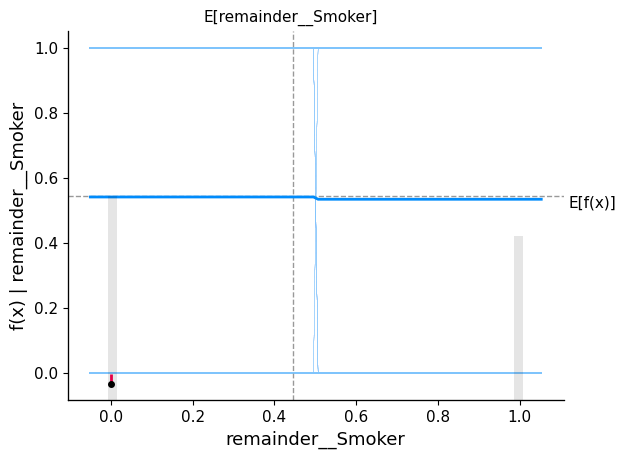

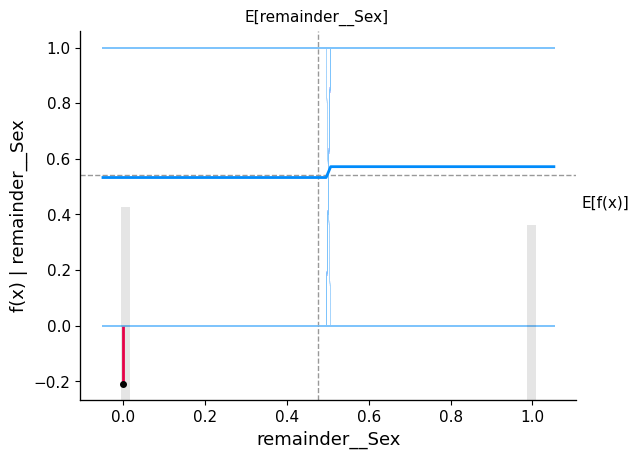

In [ ]:
# Inserte código para generar gráficos PDP aquí


X1000 = shap.utils.sample(df_transform, 1000)

sample_ind = 20
for name in feature_names[perm_sorted_idx][:5]:
  shap.partial_dependence_plot(
      name, XGB.predict, X1000, model_expected_value=True,
      feature_expected_value=True, ice=True,
      shap_values=shap_values[sample_ind:sample_ind+1,:])

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.4 MB/s eta 0:00:00


In [ ]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes, Length: 70692, dtype: float64

In [ ]:
from alibi.explainers import AnchorTabular

#Se divide el dataset transformado
X_ttrain, X_ttest, y_ttrain, y_ttest = train_test_split(df_transform, y, test_size=0.33, random_state=17, stratify=y)

#Se crea y entrena el clasificador xgboost
clf = xgboost.XGBClassifier()
clf.fit(X_ttrain, y_ttrain)

#Se predice y muestran las métricas clásicas de la predicción
preds = clf.predict(X_ttest)
print(classification_report(preds, y_ttest))
#Matriz de Confusión
fig = px.imshow(confusion_matrix(y_ttest, preds, normalize='true'), text_auto=True,color_continuous_scale='BuPu')
fig.show()

#Finalmente se crea el explainer para crear el sistema de reglas
predict_fn = lambda x: clf.predict(x)
explainer = AnchorTabular(predict_fn, clf.feature_names_in_, seed=17)
explainer.fit(X_ttrain.to_numpy())

              precision    recall  f1-score   support

           0       0.70      0.77      0.73     10653
           1       0.79      0.73      0.76     12676

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.74     23329
weighted avg       0.75      0.75      0.75     23329



AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 17, 'disc_perc': (25, 50, 75)},
  'version': '0.9.3'}
)

In [ ]:
explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]

1

In [ ]:
# Inserte su código para generar sistema de reglas aquí
class_names = ["paciente_sin_diabetes", "paciente_diabético"]

idx = 1000
# explicar predicción idx 1000
print('\n Resultados sistema de reglas para la observación 1000 \n')
explanation = explainer.explain(X_ttest.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_ttest.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 3001
# explicar predicción idx 3001
print('\n Resultados sistema de reglas para la observación 3001 \n')
explanation = explainer.explain(X_ttest.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_ttest.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 5751
# explicar predicción idx 5751
print('\n Resultados sistema de reglas para la observación 5751 \n')
explanation = explainer.explain(X_ttest.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_ttest.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)


 Resultados sistema de reglas para la observación 1000 

Prediction:  paciente_sin_diabetes
Anchor: MinMax__GenHlth <= 0.25 AND remainder__HighBP <= 0.00 AND MinMax__BMI <= 0.20
Precision: 0.98
Coverage: 0.19

 Resultados sistema de reglas para la observación 3001 

Prediction:  paciente_sin_diabetes
Anchor: MinMax__GenHlth <= 0.25 AND remainder__HighBP <= 0.00 AND MinMax__BMI <= 0.24
Precision: 0.96
Coverage: 0.22

 Resultados sistema de reglas para la observación 5751 

Prediction:  paciente_sin_diabetes
Anchor: MinMax__Age <= 0.50 AND remainder__HighBP <= 0.00 AND MinMax__BMI <= 0.15
Precision: 0.96
Coverage: 0.08


# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>